 # Prediksi Status Kematian Pasien Virus COVID-19 

<h2> Deskripsi Masalah </h2>

Dengan jumlah kasus yang dapat melonjak dengan signifikan sewaktu-waktu dan ketersediaan 
sumber daya medis yang terbatas kami rasa perlu langkah yang efektif dan efisien dalam 
mengobati pasien yang terinfeksi COVID-19, salah satunya dengan mengklasifikasikan status 
pasien. Tenaga medis memerlukan bantuan untuk mengklasifikasi status pasien berdasarkan data 
pasien secara otomatis untuk mengurangi kelelahan tenaga medis yang harus terus bertugas dan 
meminimalisir resiko penanganan yang terlambat terhadap pasien Oleh karena itu dibutuhkan 
solusi teknologi berbasis data secara otomatis yang dapat membantu mengklasifikasikan status 
kegawatan berdasarkan data pasien.
Dalam project ini kami akan membuat model prediktif yang dapat memprediksi status kematian 
akibat virus covid-19 secara akurat, mengidentifikasi predictor terpenting kematian akibat covid19 secara akurat, 
dan mengidentifikasikan predictor terpenting dari kematian covid-19.

<h2> Library </h2>

In [1]:
#import library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2> Data </h2> 

Data pasien covid yang di publish oleh pemerintah Mexico yang kami peroleh dari https://www.gob.mx/salud/documentos/datos-abiertos-152127   , dengan jumlah pasien kurang lebih sebanyak 50.000

In [2]:
#Data 
dt =pd.read_csv('covid.csv')
dt.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

<h2>Input Variables </h2>

1. Id (numeric)<br>
2. sex : jenis kelamin (kategorik) <br>
3. patient_type : apakah dirawat di rs atau tidak (kategorik)<br>
4. entry_date : tanggal masuk rs (numeric) <br>
5. date_symptoms : tanggal mulai gejala (numeric)<br>
6. date_died : apakah mati atau tidak (kategorik) <br>
7. intubed : apakah pasien membutuhkan intubasi atau tidak (kategorik) <br>  
8. pneunomia : penderita pneunomia (kategorik) <br>    
9. age : usia dalam tahun (numeric) <br>    
10. pregnancy : kehamilan (kategorik)<br>   
11. copd : apakah pasien memiliki riwayat Chronic obstructive pulmonary disease (COPD) (kategorik)<br>
12. asthma : apakah pasien memiliki riwayat asthma (kategorik) <br>   
13. inmsupr : apakah pasien terindikasi immunosuppressed (kategorik) <br>    
14. hypertension : apakah pasien terindikasi hypertension (kategorik) <br>
15. other_disease : apakah pasien memiliki riwayat penyakit lainnya (kategorik)<br>
16. cardiovascular : apakah pasien terindikasi cardiovascular (kategorik) <br>
17. obesity : apakah pasien mengalami obesitas (kategorik)<br>
18. renal_chronic : apakah pasien memiliki riwayat penyakit chronic renal (kategorik) <br>
19. tobacco : apakah pasien perokok (kategorik) <br>
20. contact_other_covid : apakah pasien kontak dengan pasien positif COVID (kategorik) <br>
21. covid_res : apakah pasien covid atau tidak (kategorik) <br>   
22. icu : apakah pasien perlu diberikan perawatan di ICU atau tidak (kategorik) <br>
    
    
**Keterangan**

1 = YA <br>
2 = TIDAK <br>
97,98,99 = MISSING VALUE

<h2> Predict Variable </h1>

status(Y) = apakah pasien teridentifikasi meninggal atau tidak ? 


1 = iya ; 0 = tidak

Diperoleh dari kolom "date_died" dengan membuat kolom baru untuk status pasien apakah meninggal atau tidak , jika pada kolom date_died teridentifikasi tanggal meninggalnya maka pasien teridentifikasi sebagai meninggal dan sebaliknya pada variabel y


<h2> Adding A New Column As Predict Variable </h2>

In [5]:
dt['status'] = dt['date_died'].apply(lambda x: 0 if x == '9999-99-99' else 1)
dt

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,status
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,1,97,0
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,99,1,97,0
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,1,2,2,99,1,2,0
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,99,1,2,0
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,1,2,1,2,2,2,99,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,01ff60,2,1,13-05-2020,03-05-2020,9999-99-99,97,2,58,97,...,2,2,2,2,2,2,2,3,97,0
566598,047cd1,1,1,07-04-2020,06-04-2020,9999-99-99,97,2,48,2,...,2,2,2,2,2,2,2,3,97,0
566599,1beb81,1,2,14-05-2020,01-05-2020,9999-99-99,2,1,49,2,...,2,2,2,1,2,2,99,3,2,0
566600,16fb02,1,1,31-05-2020,29-05-2020,9999-99-99,97,1,43,2,...,2,2,2,2,2,2,2,3,97,0


<h1> Data Cleaning </h1>

<h2>    Feature Selection </h2>

In [6]:
dt.drop(columns={"id","entry_date","date_symptoms","date_died","sex","patient_type","icu"}, axis=1, inplace=True)
dt

,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,status
0,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,0
1,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,0
2,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,0
3,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,0
4,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,97,2,58,97,1,2,2,2,2,2,2,2,2,2,2,3,0
566598,97,2,48,2,2,2,2,2,2,2,2,2,2,2,2,3,0
566599,2,1,49,2,2,2,2,2,2,2,2,1,2,2,99,3,0
566600,97,1,43,2,2,2,2,2,2,2,2,2,2,2,2,3,0


<h2> Missing Values </h2>

Mengganti semua missing value(97,98,99) pada data menjadi NaN kecuali pada kolom Age

In [7]:
temp = dt['age'] 
dt= dt.replace([97,98,99], [np.nan for i in range(3)])
dt['age'] = temp

Memeriksa jumlah missing value

In [8]:
print(dt.isnull().sum())

intubed                444813
pneumonia                  11
age                         0
pregnancy              288699
diabetes                 1981
copd                     1749
asthma                   1752
inmsupr                  1980
hypertension             1824
other_disease            2598
cardiovascular           1822
obesity                  1781
renal_chronic            1792
tobacco                  1907
contact_other_covid    175031
covid_res                   0
status                      0
dtype: int64


Drop All miss value

In [9]:
dt= dt.dropna()

Memastikan bahwa sudah tidak ada miss value

In [10]:
print(dt.isnull().sum())

intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
status                 0
dtype: int64


Miss Value sudah teratasi

<h2> Visualisasi Nilai Korelasi </h2>

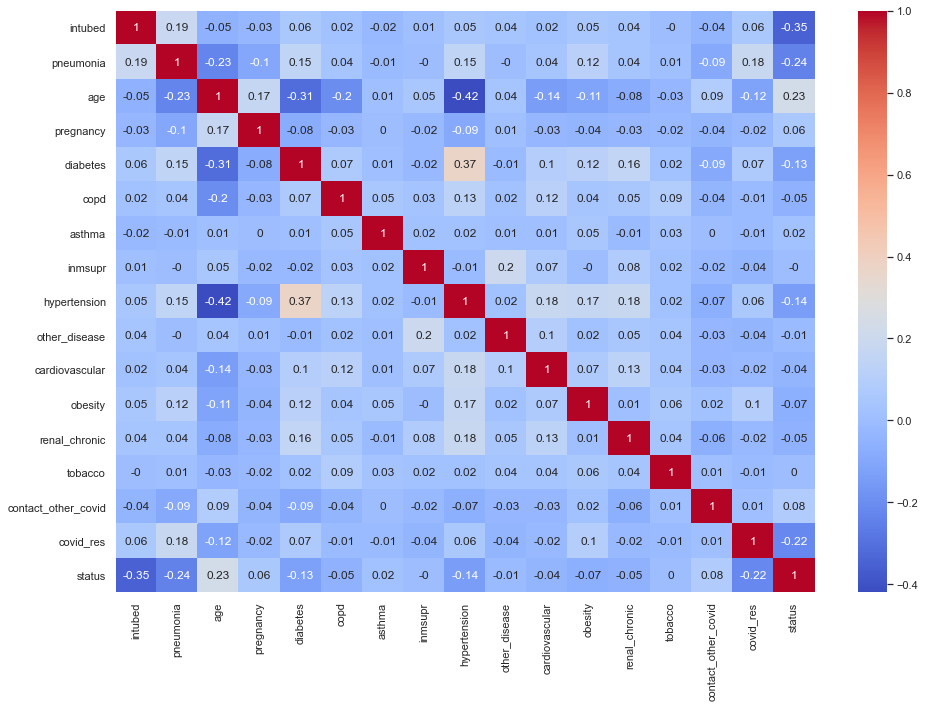

In [11]:
#ngecek heatmap dengan angka
plt.figure(figsize=(14,10))
sns.set(style = "white", font_scale = 1)
sns.heatmap(data = dt.corr().round(2), cmap = "coolwarm", annot=True, annot_kws = {"size":12})
plt.tight_layout()
plt.show()

- intubed = -0.35 
- pneumonia = -0.24 
- age = 0.23
- **pregnancy = 0.06**
- diabetes = -0.13
- **copd = -0.05**
- **asthma =0.02**
- **inmsupr = -0**
- hypertension = -0.14 
- **other_disease = -0.01**
- **cardiovascular = -0.04**
- **obesity = -0.07**
- **renal_chronic = -0.05**
- **tobacco = 0**
- **contact_other_covid= -0.08**
- **covid_res= 0.08**

<h2> Feature Selection </h2>


Tidak menggunakan atribut/fitur yang memiliki korelasi terhadap variabel dependen dibawah 0.1

In [12]:
dt.drop(columns={"tobacco","inmsupr","pregnancy", "copd", "asthma", "other_disease", "cardiovascular", "renal_chronic", "contact_other_covid", "covid_res"}, axis=1, inplace=True)
dt}, axis=1, inplace=True)
dt

,intubed,pneumonia,age,diabetes,hypertension,obesity,status
21,2.0,2.0,25,2.0,2.0,2.0,0.0
30,2.0,2.0,52,2.0,2.0,1.0,0.0
71,2.0,1.0,51,2.0,2.0,2.0,0.0
79,1.0,1.0,67,1.0,1.0,1.0,0.0
93,2.0,1.0,59,1.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...
566497,2.0,1.0,62,2.0,2.0,2.0,0.0
566499,2.0,2.0,35,2.0,2.0,1.0,0.0
566543,2.0,1.0,57,2.0,1.0,1.0,0.0
566559,2.0,2.0,17,2.0,2.0,2.0,0.0


Mengganti level pada setiap variabel input<br>
2->0 

In [13]:
temp = dt['age'] 
dt.replace(2.0,0,inplace=True)
dt.replace(1.0,1,inplace=True)
dt['age'] = temp
dt.head()

,intubed,pneumonia,age,diabetes,hypertension,obesity,status
21,0.0,0.0,25,0.0,0.0,0.0,0.0
30,0.0,0.0,52,0.0,0.0,1.0,0.0
71,0.0,1.0,51,0.0,0.0,0.0,0.0
79,1.0,1.0,67,1.0,1.0,1.0,0.0
93,0.0,1.0,59,1.0,0.0,0.0,0.0


<h1> Data Exploration </h1>

In [15]:
dt['status'].value_counts()

0.0    19138
1.0     4020
Name: status, dtype: int64

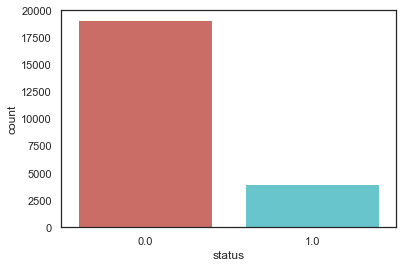

<Figure size 432x288 with 0 Axes>

In [16]:
sns.countplot(x='status',data=dt,palette='hls')
plt.show()
plt.savefig('count_plot')

In [39]:
dt['status']

21        0.0
30        0.0
71        0.0
79        0.0
93        0.0
         ... 
566497    0.0
566499    0.0
566543    0.0
566559    0.0
566578    1.0
Name: status, Length: 23158, dtype: float64

In [17]:
count_not_death = len(dt[dt['status']==0])
count_death = len(dt[dt['status']==1])
pct_of_not_death = count_not_death/(count_not_death+count_death)
print("percentage of not death is", pct_of_not_death*100)
pct_of_death = count_death/(count_not_death+count_death)
print("percentage of death", pct_of_death*100)

percentage of not death is 82.64098799550911
percentage of death 17.35901200449089


Data Imbalanced , ratio status pasien meninggal dengan tidak meninggal adalah 17: 83.

<h2> Handling Imbalanced Data </h2>


Terdapat 2 cara yang dapat dilakukan , yaitu undersampling dan oversampling . Oversampling adalah teknik mengambil kelas minoritas sedemikian rupa sehingga proporsinya dalam sample lebih besar dibandingkan proporsi asalnya. 

kelas minoritas =pasien meninggal 
kelas mayoritas =pasien tidak meninggal


In [88]:
!pip3 install imblearn

<h2> SMOTE </h2> <br> 
Mensintesis sampel baru dari kelas minoritas untuk menyeimbangkan dataset dengan cara sampling ulang sampel kelas minoritas

In [19]:
X = dt.loc[:, dt.columns != 'status']
y = dt.loc[:, dt.columns == 'status']
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['status'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of not death in oversampled data",len(os_data_y[os_data_y['status']==0]))
print("Number of death",len(os_data_y[os_data_y['status']==1]))
print("Proportion of not death data in oversampled data is ",len(os_data_y[os_data_y['status']==0])/len(os_data_X))
print("Proportion of death data in oversampled data is ",len(os_data_y[os_data_y['status']==1])/len(os_data_X))


length of oversampled data is  26846
Number of not death in oversampled data 13423
Number of death 13423
Proportion of not death data in oversampled data is  0.5
Proportion of death data in oversampled data is  0.5


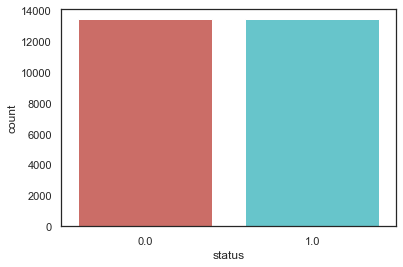

<Figure size 432x288 with 0 Axes>

In [45]:
sns.countplot(x='status',data=os_data_y,palette='hls')
plt.show()
plt.savefig('count_plot')

Imbalanced dataset teratasi

<h1> Data Modelling </h1>

Menggunakan Regresi Logistik 

**Regresi Logistik** <br>
Algoritma klasifikasi Machine Learning yang digunakan untuk memprediksi probabilitas variabel dependen kategoris. Dalam regresi logistik, variabel dependen adalah variabel biner yang berisi data berkode 1 (ya, berhasil, dst) atau 0 (tidak, gagal, dst). Dengan kata lain, model regresi logistik memprediksi P(Y=1) sebagai fungsi dari X.

<h3> Variable Definition </h2>

In [34]:
cols=['intubed','pneumonia','age','diabetes','hypertension','obesity']
X=os_data_X[cols]
y=os_data_y['status']

<h2> Implementing the model </h2>

In [35]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.626630
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.096     
Dependent Variable: status           AIC:              33657.0448
Date:               2021-12-12 22:32 BIC:              33706.2320
No. Observations:   26846            Log-Likelihood:   -16823.   
Df Model:           5                LL-Null:          -18608.   
Df Residuals:       26840            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
intubed           1.7383   0.0428  40.6525 0.0000  1.6545  1.8221
pneumonia         0.5310   0.0302  17.5840 0.0000  0.4718  0.5901


semua nilai *p-value* dari seluruh variabel lebih kecil dari 0.05

<h2> Logistic Regression Model Fitting </h2>

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

<h2> Evaluate Model </h2> 

In [24]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.71


<h3> Confusion Matrix </h3>

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2759 1269]
 [1027 2999]]


*Interpretasi* = Hasil diatas menunjukkan bahwa terdapat 2759+2999 prediksi yang benar dan 1027+1269 prediksi yang salah

<h3> Compute precision, recall, F-measure and support </h3>

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.68      0.71      4028
         1.0       0.70      0.74      0.72      4026

    accuracy                           0.71      8054
   macro avg       0.72      0.71      0.71      8054
weighted avg       0.72      0.71      0.71      8054



<h3> ROC Curve </h3> 

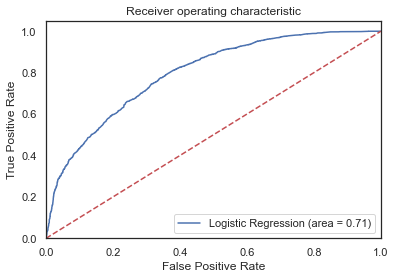

In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<h2> Save and Restore Models </h2>   <br>
Dalam beberapa baris kode di bawah ini, model yang kita buat pada langkah sebelumnya disimpan ke file, dan kemudian dimuat sebagai objek baru yang disebut logregp. Model yang dimuat kemudian digunakan untuk menghitung skor akurasi dan memprediksi hasil pada data (tes) baru yang tidak terlihat.

In [28]:
import pickle

In [29]:
Pkl_Filename = "Pickle_RL_Model2.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(logreg, file)

In [30]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    logregp= pickle.load(file)

logregp

LogisticRegression()

In [31]:
# Calculate the Score 
score = logregp.score(X_test, y_test)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = logregp.predict(X_test)  

Ypredict

Test score: 71.49 %


array([1., 0., 0., ..., 1., 0., 0.])

In [32]:
#read pickle

object = pd.read_pickle(r'Pickle_RL_Model2.pkl')
object

LogisticRegression()

In [33]:
p = pd.read_pickle(r'model (1).pkl')
p

LinearRegression()